# Collision detection analysis
- Here is the Analysis of the threshold to find the closest value of the collision on the jerk in terms of to define when is produced the collision.
---

The expression for linear jerk is:
$$
j(t) = \frac{d a(t)}{dt} = \frac{d^2 v(t)}{dt^2} = \frac{d^3 r(t)}{dt^3}
$$
Where:
- $ r(t) = \begin{bmatrix} x(t) & y(t) \end{bmatrix}^{T} $ is the position vector of the robot.
- $ v(t) = \frac{dr(t)}{dt} $ is the velocity vector.
- $ a(t) = \frac{d^2 r(t)}{dt^2} $ is the acceleration vector.
- $ j(t) = \frac{d^3 r(t)}{dt^3} $ is the linear jerk vector.

The expression for rotational jerk is:
$$
\zeta(t) = \frac{d \alpha(t)}{dt} = \dot{\alpha}(t) = \ddot{\omega}(t)
$$
Where:
- $ \alpha(t) $ is the angular acceleration (rate of change of angular velocity).
- $ \omega(t) $ is the angular velocity.

## Combined Jerk: Linear and Rotational
I propose a weighted jerk filter using a convex combination of linear and rotational jerk to aproach to a real collision detection:
$$
J_d = (1 - \eta) j(t) + \eta \zeta(t)
$$
Where:
- $ \eta \in [0, 1] $ is a tunable parameter to balance the contributions of linear jerk $ j(t) $ and rotational jerk $ \zeta(t) $.
- $ J_d $ is the resulting "combined jerk."

- In terms of have the same units on the both terms, we can define a new variable as:

$$\zeta_{linear}(t) = r * \zeta (t)$$

Where:
- $ r $ is the aproximation radius of the robot.
- $ \zeta_{lineat} (t) $ is the resulting of the "cicular jerk"


- Firts, we have to install the modules to do the analisys.

In [19]:
!pip install numpy==1.26.4
!pip install pandas
!pip install plotly
!pip install scikit-learn
!pip install pybind11
!pip install matplotlib==3.6 --user


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


- Here is the import of the libraries to analyze the data

In [20]:
import numpy as np
import pandas as pd 
import plotly.express as px
# from sklearn import svm
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [ ]:
data_jerk = pd.read_csv(r'out0_cam.csv')
# data_jerk['timestamp_nsec'] = (data_jerk['timestamp_nsec'] - data_jerk['timestamp_nsec'][0]) # nano sec per sec why -_-
data_jerk['time(s)'] = data_jerk['timestamp_sec'] + data_jerk['timestamp_nsec'] / 1e9
# data_jerk = data_jerk.drop(columns=['timestamp_nsec'])
for axis in ['x', 'y', 'z']:
    data_jerk[f'linear_acceleration_{axis}'] = data_jerk[f'linear_acceleration_{axis}'].astype(float)

In [33]:
data_jerk.head(100)

,timestamp_sec,timestamp_nsec,orientation_x,orientation_y,orientation_z,orientation_w,angular_velocity_x,angular_velocity_y,angular_velocity_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,time(s)
0,1729719098,589181820,-0.018265,-0.059284,0.095920,0.993454,-0.030000,0.028889,0.090000,0.47,-1.45,8.08,1.729719e+09
1,1729719098,619213648,-0.018004,-0.060938,0.097497,0.993205,0.021111,-0.100000,0.088889,-0.04,-1.47,12.47,1.729719e+09
2,1729719098,640154677,-0.017882,-0.061499,0.098564,0.993068,-0.022222,-0.028889,0.060000,0.45,-0.65,9.56,1.729719e+09
3,1729719098,676619542,-0.018390,-0.061563,0.099072,0.993004,-0.010000,0.031111,0.052222,-0.17,-1.86,7.82,1.729719e+09
4,1729719098,706997080,-0.018323,-0.061583,0.100155,0.992895,-0.005556,0.011111,0.077778,-0.03,-1.58,10.05,1.729719e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1729719101,714556938,-0.012135,-0.057350,0.140529,0.988340,-0.045556,-0.094444,-0.064444,-3.10,-1.67,9.39,1.729719e+09
96,1729719101,750018535,-0.012721,-0.056894,0.141052,0.988284,-0.003333,0.104444,0.057778,-1.92,-1.37,9.97,1.729719e+09
97,1729719101,775768189,-0.012925,-0.055285,0.141637,0.988289,-0.007778,0.068889,0.033333,-1.50,-1.06,10.13,1.729719e+09
98,1729719101,812444582,-0.012847,-0.055824,0.141622,0.988262,-0.002222,-0.080000,-0.030000,-1.76,-1.40,9.85,1.729719e+09


In [35]:
for axis in ['x', 'y', 'z']:
    data_jerk[f'jerk_{axis}'] = np.gradient(data_jerk[f'linear_acceleration_{axis}'], data_jerk['time(s)'])

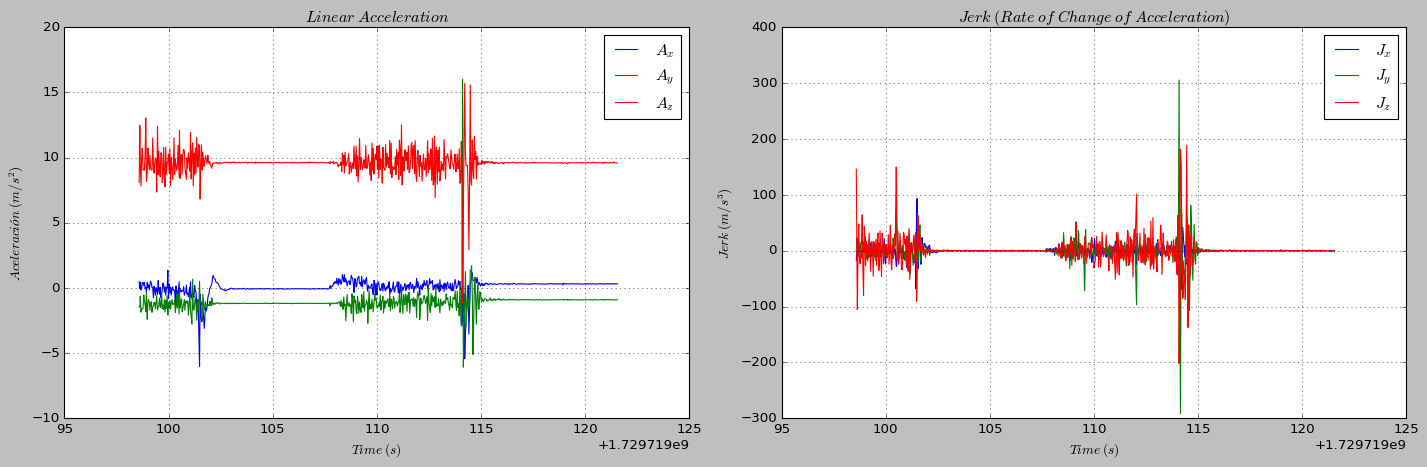

In [ ]:
plt.figure(figsize=(18, 6))
plt.style.use('classic')

# Subplot de aceleraciones
plt.subplot(1, 2, 1)
for axis in ['x', 'y', 'z']:
    plt.plot(data_jerk["time(s)"], data_jerk[f"linear_acceleration_{axis}"], label=f"Aceleración {axis}")
plt.title(r"$Linear\;Acceleration$")
plt.xlabel(r"$Time\; (s)$")
plt.ylabel(r"$Aceleración\; (m/s^2)$")
plt.legend([r"$A_{x}$", r"$A_{y}$", r"$A_{z}$"])
plt.grid()

# Subplot of jerk per
plt.subplot(1, 2, 2)
for axis in ['x', 'y', 'z']:
    plt.plot(data_jerk["time(s)"], data_jerk[f"jerk_{axis}"], label=f"Jerk {axis}")
plt.title(r"$Jerk\; (Rate\; of\; Change\; of\; Acceleration)$")
plt.xlabel(r"$Time\; (s)$")
plt.ylabel(r"$Jerk\; (m/s^3)$")
plt.legend([r"$J_{x}$", r"$J_{y}$", r"$J_{z}$"])
plt.grid()

plt.tight_layout()
plt.show()


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Gen a threshold
jerk_threshold = 100
data_jerk['collision_risk'] = ((data_jerk['jerk_x'] > jerk_threshold) | 
                        (data_jerk['jerk_y'] > jerk_threshold) | 
                        (data_jerk['jerk_z'] > jerk_threshold)).astype(int)

# Get the features and labels
features = ['linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z',
            'jerk_x', 'jerk_y', 'jerk_z']
X = data_jerk[features]
y = data_jerk['collision_risk']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train random forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Eval
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00         1

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [49]:
# support from https://stackoverflow.com/questions/56107259/how-to-save-a-trained-model-by-scikit-learn
import joblib
joblib.dump(model, 'collision_detection_model.pkl')

['collision_detection_model.pkl']

- windows

In [48]:
!pip3 install torch torchvision torchaudio

   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 1.3/203.1 MB 6.7 MB/s eta 0:00:31
    --------------------------------------- 3.4/203.1 MB 8.1 MB/s eta 0:00:25
    --------------------------------------- 4.2/203.1 MB 8.7 MB/s eta 0:00:23
    --------------------------------------- 4.2/203.1 MB 8.7 MB/s eta 0:00:23
    --------------------------------------- 4.2/203.1 MB 8.7 MB/s eta 0:00:23
    --------------------------------------- 4.7/203.1 MB 3.7 MB/s eta 0:00:54
   - -------------------------------------- 6.3/203.1 MB 4.2 MB/s eta 0:00:47
   - -------------------------------------- 7.1/203.1 MB 4.6 MB/s eta 0:00:43
   - -------------------------------------- 7.1/203.1 MB 4.6 MB/s eta 0:00:43
   - -------------------------------------- 7.1/203.1 MB 4.6 MB/s eta 0:00:43
   - -------------------------------------- 7.3/203.1 MB 3.2 MB/s eta 0:01:02
   - -------------------------------------- 8.7/203.1 MB 3.4 MB/s eta 0

- Linux

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)

# Split Data 
train_size = int(0.7 * len(X_tensor))
X_train, X_val = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_val = y_tensor[:train_size], y_tensor[train_size:]

# nn
class CollisionModel(nn.Module):
    def __init__(self):
        super(CollisionModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(X_tensor.shape[1], 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.fc(x)

model = CollisionModel()
criterion = nn.BCELoss()  # to binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    
    # Validate the model
    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")


Epoch 10/1000, Loss: 0.7225, Val Loss: 0.7068
Epoch 20/1000, Loss: 0.7040, Val Loss: 0.6932
Epoch 30/1000, Loss: 0.6878, Val Loss: 0.6805
Epoch 40/1000, Loss: 0.6726, Val Loss: 0.6680
Epoch 50/1000, Loss: 0.6577, Val Loss: 0.6533
Epoch 60/1000, Loss: 0.6416, Val Loss: 0.6362
Epoch 70/1000, Loss: 0.6226, Val Loss: 0.6169
Epoch 80/1000, Loss: 0.6008, Val Loss: 0.5951
Epoch 90/1000, Loss: 0.5761, Val Loss: 0.5709
Epoch 100/1000, Loss: 0.5488, Val Loss: 0.5444
Epoch 110/1000, Loss: 0.5188, Val Loss: 0.5154
Epoch 120/1000, Loss: 0.4863, Val Loss: 0.4843
Epoch 130/1000, Loss: 0.4513, Val Loss: 0.4512
Epoch 140/1000, Loss: 0.4145, Val Loss: 0.4164
Epoch 150/1000, Loss: 0.3766, Val Loss: 0.3807
Epoch 160/1000, Loss: 0.3393, Val Loss: 0.3447
Epoch 170/1000, Loss: 0.3036, Val Loss: 0.3092
Epoch 180/1000, Loss: 0.2702, Val Loss: 0.2752
Epoch 190/1000, Loss: 0.2397, Val Loss: 0.2435
Epoch 200/1000, Loss: 0.2121, Val Loss: 0.2142
Epoch 210/1000, Loss: 0.1877, Val Loss: 0.1878
Epoch 220/1000, Loss: 